<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_0_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.084527,87.621300,71.084931,-0.122405,208.668353,208.817844,-0.149491
1,0.0,1.0,36.984514,69.001506,71.195387,0.175824,187.357232,187.101007,0.256225
2,0.0,2.0,29.002641,52.516165,22.032962,-0.279612,113.272157,113.458531,-0.186374
3,0.0,3.0,71.767835,63.553258,67.356160,-0.225749,212.451504,212.731952,-0.280447
4,0.0,4.0,94.424272,89.406628,91.107042,0.168845,285.106787,285.172039,-0.065252
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.657453,49.346113,40.850897,0.185735,139.040198,138.832805,0.207393
19996,999.0,16.0,65.496566,91.112681,98.989366,0.148327,265.746940,265.685479,0.061461
19997,999.0,17.0,95.088600,60.510366,57.021663,-0.067789,222.552839,222.589381,-0.036543
19998,999.0,18.0,62.162770,31.180357,75.595939,-0.554118,178.384948,178.942393,-0.557446


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    40.084527  87.621300  71.084931 -0.122405  208.668353   
      1.0    36.984514  69.001506  71.195387  0.175824  187.357232   
      2.0    29.002641  52.516165  22.032962 -0.279612  113.272157   
      3.0    71.767835  63.553258  67.356160 -0.225749  212.451504   
      4.0    94.424272  89.406628  91.107042  0.168845  285.106787   
...                ...        ...        ...       ...         ...   
999.0 15.0   38.657453  49.346113  40.850897  0.185735  139.040198   
      16.0   65.496566  91.112681  98.989366  0.148327  265.746940   
      17.0   95.088600  60.510366  57.021663 -0.067789  222.552839   
      18.0   62.162770  31.180357  75.595939 -0.554118  178.384948   
      19.0   45.994800  42.514986  47.455144 -0.155520  145.809410   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    208.817844 -0.149491  
      1.0    187.101007  0.256225  
      2.0    113.458531 -0.186374  
      3.0    212.731952 -0.280447  
      4.0    285.172039 -0.065252  
...                 ...       ...  
999.0 15.0   138.832805  0.207393  
      16.0   265.685479  0.061461  
      17.0   222.589381 -0.036543  
      18.0   178.942393 -0.557446  
      19.0   145.943059 -0.133649  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    40.084527  87.621300  71.084931 -0.122405  208.668353   
      1.0    36.984514  69.001506  71.195387  0.175824  187.357232   
      2.0    29.002641  52.516165  22.032962 -0.279612  113.272157   
      3.0    71.767835  63.553258  67.356160 -0.225749  212.451504   
      4.0    94.424272  89.406628  91.107042  0.168845  285.106787   
...                ...        ...        ...       ...         ...   
999.0 15.0   38.657453  49.346113  40.850897  0.185735  139.040198   
      16.0   65.496566  91.112681  98.989366  0.148327  265.746940   
      17.0   95.088600  60.510366  57.021663 -0.067789  222.552839   
      18.0   62.162770  31.180357  75.595939 -0.554118  178.384948   
      19.0   45.994800  42.514986  47.455144 -0.155520  145.809410   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    208.817844 -0.149491  
      1.0    187.101007  0.256225  
      2.0    113.458531 -0.186374  
      3.0    212.731952 -0.280447  
      4.0    285.172039 -0.065252  
...                 ...       ...  
999.0 15.0   138.832805  0.207393  
      16.0   265.685479  0.061461  
      17.0   222.589381 -0.036543  
      18.0   178.942393 -0.557446  
      19.0   145.943059 -0.133649  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.084527,87.621300,71.084931,-0.122405,208.668353,208.817844,-0.149491
1,0.0,1.0,36.984514,69.001506,71.195387,0.175824,187.357232,187.101007,0.256225
2,0.0,2.0,29.002641,52.516165,22.032962,-0.279612,113.272157,113.458531,-0.186374
3,0.0,3.0,71.767835,63.553258,67.356160,-0.225749,212.451504,212.731952,-0.280447
4,0.0,4.0,94.424272,89.406628,91.107042,0.168845,285.106787,285.172039,-0.065252
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.657453,49.346113,40.850897,0.185735,139.040198,138.832805,0.207393
19996,999.0,16.0,65.496566,91.112681,98.989366,0.148327,265.746940,265.685479,0.061461
19997,999.0,17.0,95.088600,60.510366,57.021663,-0.067789,222.552839,222.589381,-0.036543
19998,999.0,18.0,62.162770,31.180357,75.595939,-0.554118,178.384948,178.942393,-0.557446


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    40.084527  87.621300  71.084931 -0.122405  208.668353   
      1.0    36.984514  69.001506  71.195387  0.175824  187.357232   
      2.0    29.002641  52.516165  22.032962 -0.279612  113.272157   
      3.0    71.767835  63.553258  67.356160 -0.225749  212.451504   
      4.0    94.424272  89.406628  91.107042  0.168845  285.106787   
...                ...        ...        ...       ...         ...   
999.0 15.0   38.657453  49.346113  40.850897  0.185735  139.040198   
      16.0   65.496566  91.112681  98.989366  0.148327  265.746940   
      17.0   95.088600  60.510366  57.021663 -0.067789  222.552839   
      18.0   62.162770  31.180357  75.595939 -0.554118  178.384948   
      19.0   45.994800  42.514986  47.455144 -0.155520  145.809410   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    208.817844 -0.149491  
      1.0    187.101007  0.256225  
      2.0    113.458531 -0.186374  
      3.0    212.731952 -0.280447  
      4.0    285.172039 -0.065252  
...                 ...       ...  
999.0 15.0   138.832805  0.207393  
      16.0   265.685479  0.061461  
      17.0   222.589381 -0.036543  
      18.0   178.942393 -0.557446  
      19.0   145.943059 -0.133649  

[20000 rows x 7 columns]

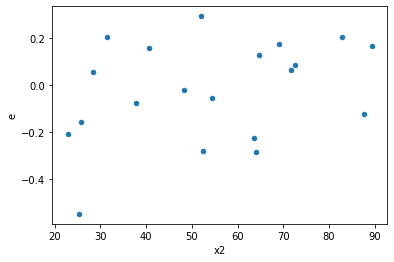

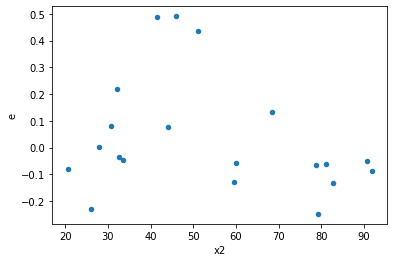

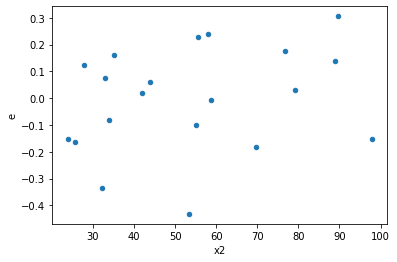

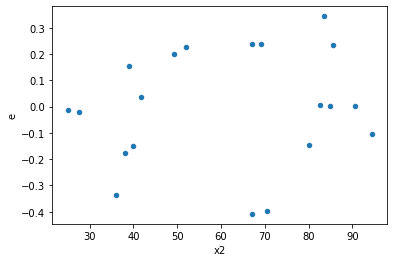

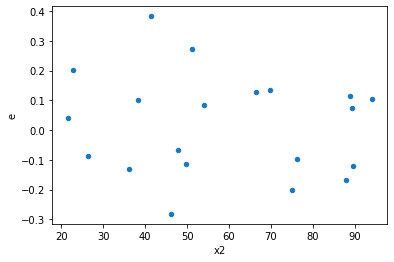

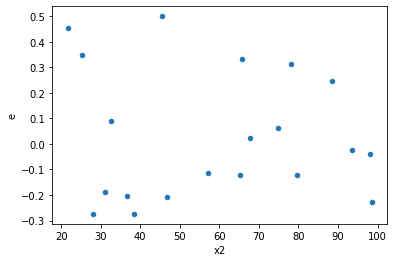

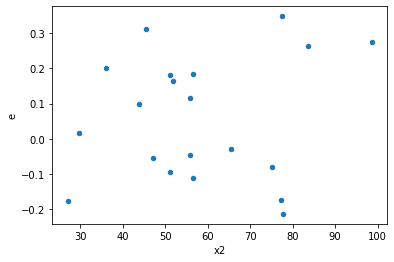

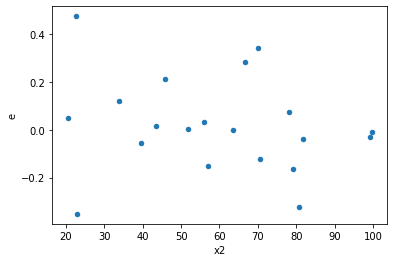

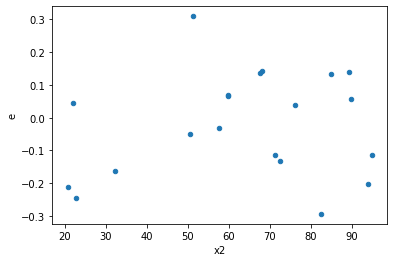

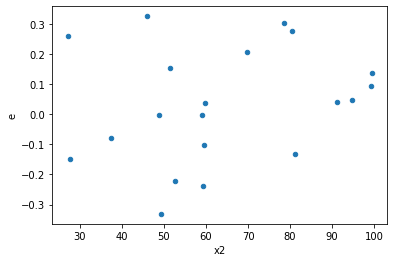

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,5.0,9.0,0.17088922732546105,0.5322052458369062,0.03417784546509221,0.05913391620410069,1.7301826782644194,0.44729324679162485,0.7763533766041876,0.22364662339581243,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,0.056184930052095634,0.17498655457732074,0.008026418578870804,0.024998079225331534,3.1144749030579946,0.15698528513277088,0.9215073574336146,0.07849264256638544,Reject001=1 : Homoscedasticity
5.0,6.0,8.0,0.10026180693612356,0.24500603201914195,0.016710301156020593,0.030625754002392744,1.8327469814246,0.4193599866970823,0.7903200066514589,0.20967999334854115,Reject001=1 : Homoscedasticity
11.0,7.0,7.0,0.1065648270385944,0.23181589433788138,0.0152235467197992,0.033116556333983055,2.175350918121652,0.32681430161520186,0.8365928491923991,0.16340715080760093,Reject001=1 : Homoscedasticity
13.0,6.0,8.0,0.08996924962470287,0.17332219871100607,0.014994874937450478,0.02166527483887576,1.444845317433466,0.6138290417340238,0.6930854791329881,0.3069145208670119,Reject001=1 : Homoscedasticity
15.0,7.0,7.0,0.2138933660199041,0.29555303175487324,0.03055619514570059,0.04222186167926761,1.3817774588080034,0.6803688883084131,0.6598155558457934,0.34018444415420657,Reject001=1 : Homoscedasticity
16.0,8.0,6.0,0.17104922177879772,0.21038682543749282,0.021381152722349715,0.035064470906248806,1.6399710231523634,0.5633467408936763,0.7183266295531618,0.28167337044683816,Reject001=1 : Homoscedasticity
19.0,6.0,8.0,0.23041349675329192,0.33204624170698227,0.03840224945888199,0.041505780213372784,1.0808163792023122,0.8923420520304157,0.5538289739847921,0.44617102601520786,Reject001=1 : Homoscedasticity
20.0,10.0,4.0,0.27994133213240396,0.26109532261346496,0.027994133213240395,0.06527383065336624,2.3316967936158015,0.4303156689290981,0.7848421655354509,0.21515783446454906,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,5.0,0.4552115919443018,0.08432336928331757,0.050579065771589084,0.016864673856663515,0.3334318971572745,0.14509879791445895,Reject001=1 : Homoscedasticity
1.0,5.0,9.0,0.17088922732546105,0.5322052458369062,0.03417784546509221,0.05913391620410069,1.7301826782644194,0.44729324679162485,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,0.056184930052095634,0.17498655457732074,0.008026418578870804,0.024998079225331534,3.1144749030579946,0.15698528513277088,Reject001=1 : Homoscedasticity
3.0,10.0,4.0,0.641922182287251,0.06341306078096738,0.06419221822872509,0.015853265195241845,0.24696552997677432,0.06632437003182916,Reject001=1 : Homoscedasticity
4.0,6.0,8.0,0.2953177395953773,0.10635098305573777,0.04921962326589622,0.013293872881967221,0.2700929426084903,0.12803201285729945,Reject001=1 : Homoscedasticity
5.0,6.0,8.0,0.10026180693612356,0.24500603201914195,0.016710301156020593,0.030625754002392744,1.8327469814246,0.4193599866970823,Reject001=1 : Homoscedasticity
6.0,11.0,3.0,0.41829121626962723,0.07884644848072236,0.03802647420632975,0.02628214949357412,0.6911539931619347,0.5644405823822958,Reject001=1 : Homoscedasticity
7.0,6.0,8.0,0.43244986829433596,0.09040271356926159,0.072074978049056,0.011300339196157699,0.15678588467229795,0.03646374266409589,Reject001=1 : Homoscedasticity
8.0,13.0,1.0,0.29658884747807157,3.6350710512584224e-26,0.022814526729082428,3.6350710512584224e-26,1.59331424860314e-24,1.5604357540574403e-148,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      925
Reject001=0 : Heteroscedasticity     75
Name: Result_test, dtype: int64